In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (8, 6)

# https://github.com/scipy/scipy/issues/5998
import warnings
warnings.filterwarnings(action='ignore', module='scipy', message='^internal gelsd')

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Pandas
import pandas as pd

# Matplotlib
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('iris.csv')
df.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


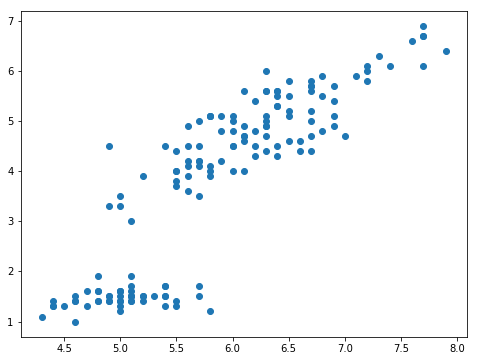

In [4]:
plt.scatter(df['Sepal.Length'], df['Petal.Length'])

In [5]:
df.labels, df.uniques = pd.factorize(df['Species'])
df.labels, df.uniques

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]),
 Index(['setosa', 'versicolor', 'virginica'], dtype='object'))

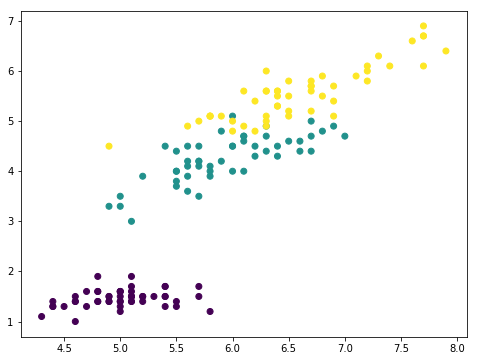

In [6]:
plt.scatter(df['Sepal.Length'], df['Petal.Length'], c=df.labels)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10eff9278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10f6d7ac8>]], dtype=object)

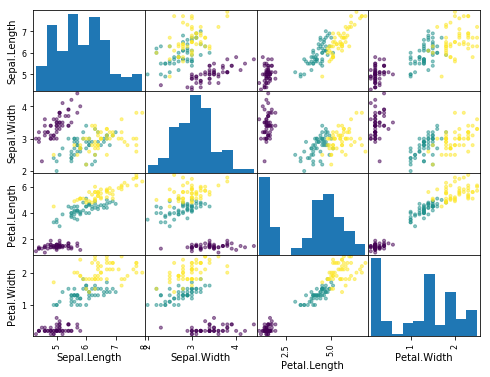

In [7]:
from pandas.tools.plotting import scatter_matrix

features = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

scatter_matrix(df[features], c=df.labels)

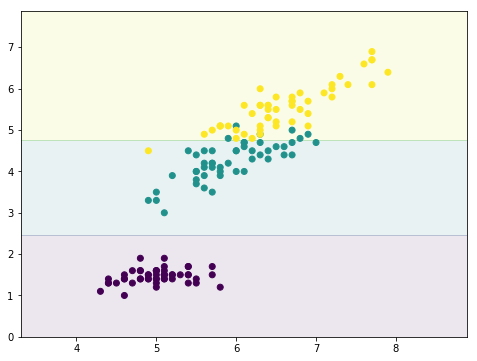

In [8]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier

features = ['Sepal.Length', 'Petal.Length']

x = df[features].as_matrix()
y = df.labels

tree = DecisionTreeClassifier(criterion='entropy', max_depth=2)
tree.fit(x, y)

# predict

xv, yv = np.meshgrid(np.arange(x[:, 0].min() - 1, x[:, 0].max() + 1, 0.01),
                     np.arange(x[:, 1].min() - 1, x[:, 1].max() + 1, 0.01))
z = tree.predict(np.stack((xv.ravel(), yv.ravel()), axis=-1))

# plot

plt.contourf(xv, yv, z.reshape(xv.shape), alpha=0.1)
plt.scatter(x[:, 0], x[:, 1], c=y)

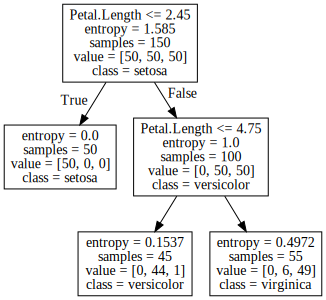

In [9]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    tree,
    feature_names=features,
    class_names=df.uniques.values,
    out_file=None
)

graphviz.Source(dot_data)

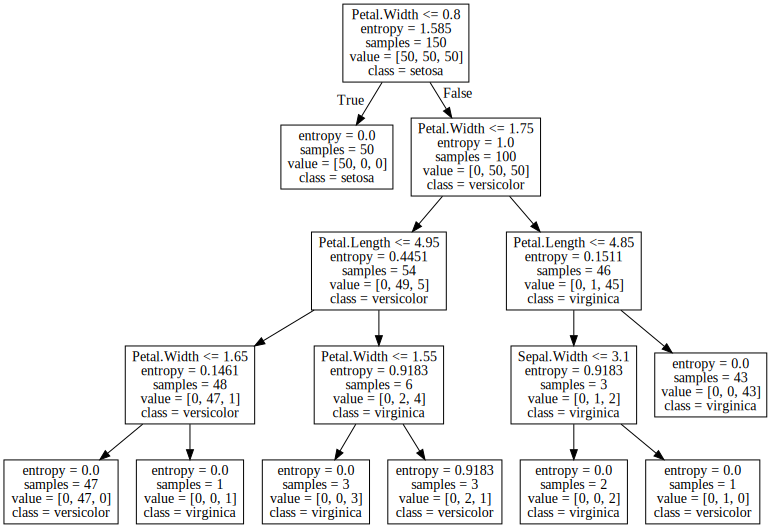

In [10]:
# Feature와 Depth 늘리기

features = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

x = df[features].as_matrix()
y = df.labels

tree = DecisionTreeClassifier(criterion='entropy', max_depth=4)
tree.fit(x, y)

dot_data = export_graphviz(
    tree,
    feature_names=features,
    class_names=df.uniques.values,
    out_file=None
)
graphviz.Source(dot_data)

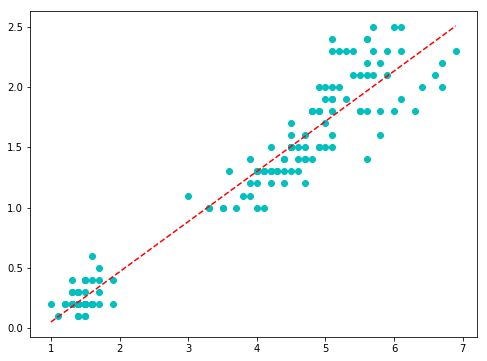

In [11]:
# Linear Regression

from sklearn.linear_model import LinearRegression

x = df[['Petal.Length']].as_matrix()
y = df['Petal.Width'].as_matrix()

regression = LinearRegression()
regression.fit(x, y)

z = regression.predict(x)

# plot

plt.scatter(x[:, 0], y, c='c')
plt.plot([x[:, 0].min(), x[:, 0].max()], [z.min(), z.max()], 'r--')

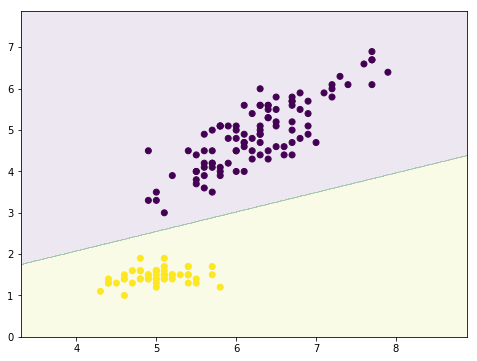

In [12]:
# Perceptron

from sklearn.linear_model import Perceptron

features = ['Sepal.Length', 'Petal.Length']

x = df[features].as_matrix()
y = df.labels == 0

perceptron = Perceptron()
perceptron.fit(x, y)

# predict

xv, yv = np.meshgrid(np.arange(x[:, 0].min() - 1, x[:, 0].max() + 1, 0.01),
                     np.arange(x[:, 1].min() - 1, x[:, 1].max() + 1, 0.01))
z = perceptron.predict(np.stack((xv.ravel(), yv.ravel()), axis=-1))

# plot

plt.contourf(xv, yv, z.reshape(xv.shape), alpha=0.1)
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.show()

1


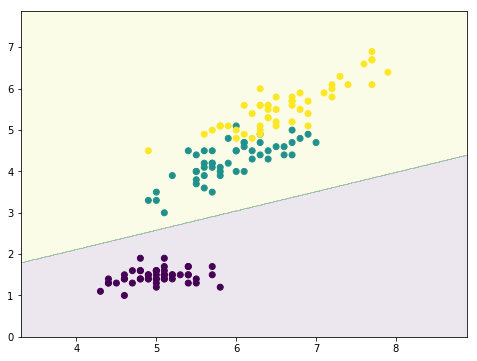

2


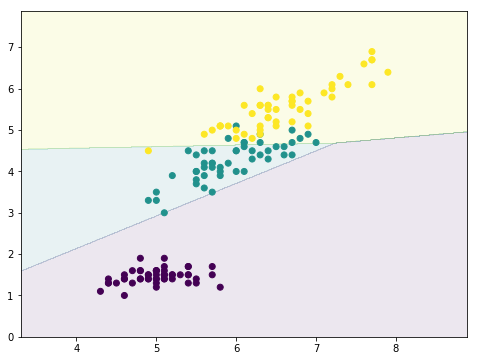

3


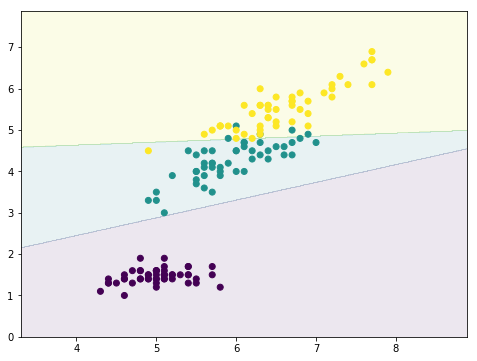

4


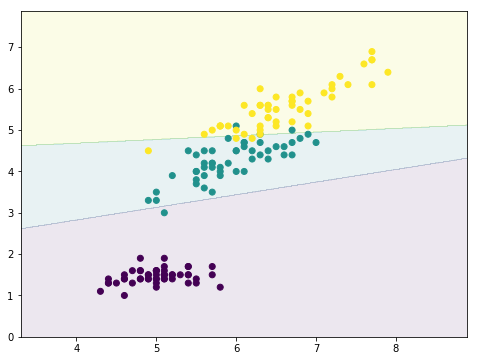

5


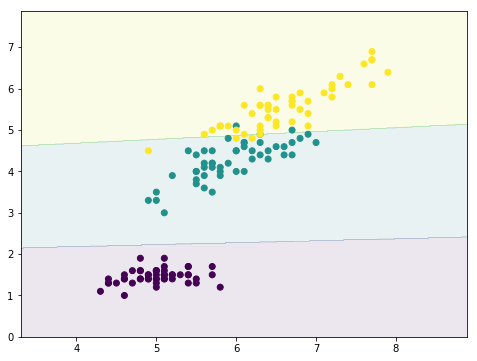

In [13]:
# SGD Classifier

from sklearn.linear_model import SGDClassifier

features = ['Sepal.Length', 'Petal.Length']

x = df[features].as_matrix()
y = df.labels

for i in range(5):
    print(i + 1)

    clf = SGDClassifier(n_iter=i * 300 + 1, random_state=1)
    clf.fit(x, y)

    # predict

    xv, yv = np.meshgrid(np.arange(x[:, 0].min() - 1, x[:, 0].max() + 1, 0.01),
                         np.arange(x[:, 1].min() - 1, x[:, 1].max() + 1, 0.01))
    z = clf.predict(np.stack((xv.ravel(), yv.ravel()), axis=-1))

    # plot

    plt.contourf(xv, yv, z.reshape(xv.shape), alpha=0.1)
    plt.scatter(x[:, 0], x[:, 1], c=y)
    plt.show()

['Sepal.Length', 'Sepal.Width']


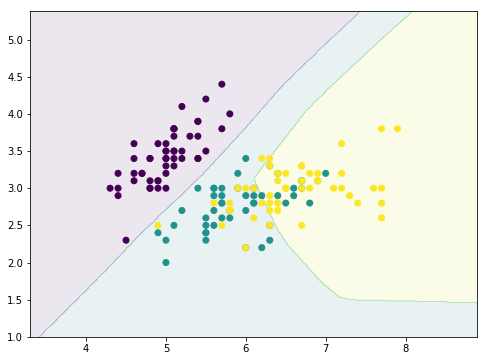

['Sepal.Length', 'Petal.Length']


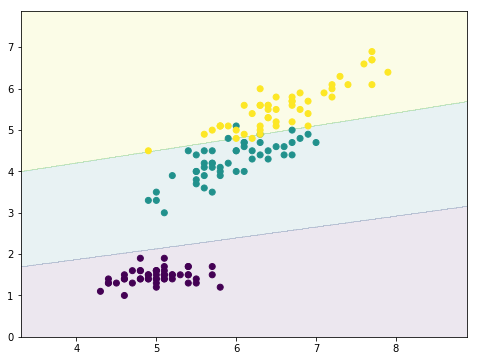

['Sepal.Length', 'Petal.Width']


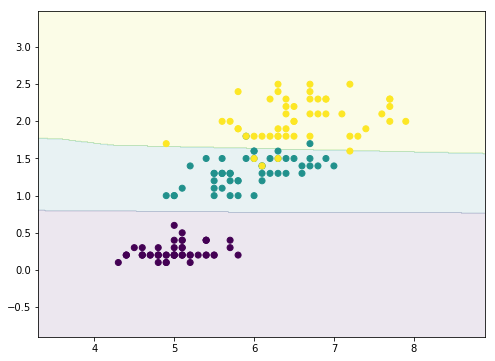

['Sepal.Width', 'Petal.Length']


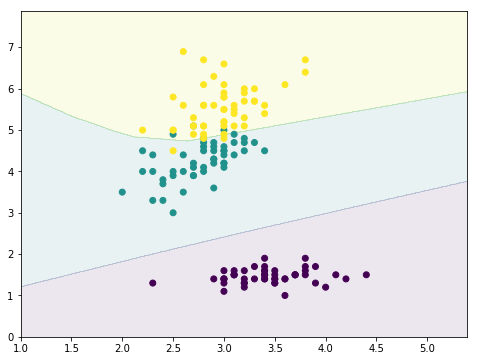

['Sepal.Width', 'Petal.Width']


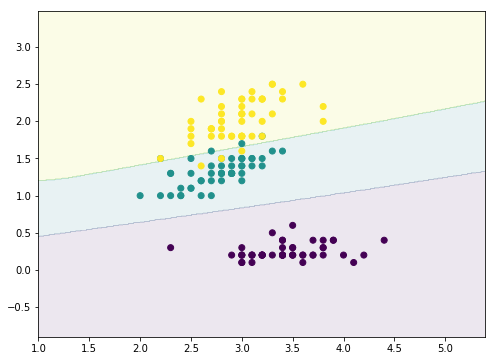

['Petal.Length', 'Petal.Width']


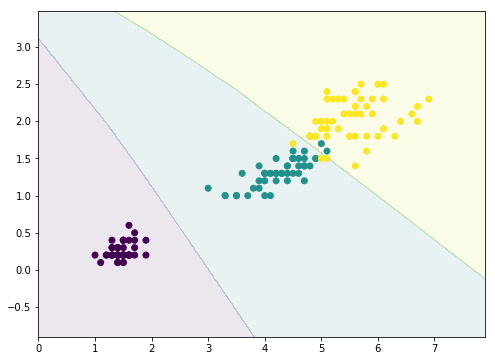

In [14]:
# Multi-layer Perceptron

from sklearn.neural_network import MLPClassifier
from itertools import combinations

all_features = ['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

for features in [list(i) for i in combinations(all_features, 2)]:
    print(features)

    x = df[features].as_matrix()
    y = df.labels

    clf = MLPClassifier(solver='lbfgs', random_state=1)
    clf.fit(x, y)

    # predict

    xv, yv = np.meshgrid(np.arange(x[:, 0].min() - 1, x[:, 0].max() + 1, 0.01),
                         np.arange(x[:, 1].min() - 1, x[:, 1].max() + 1, 0.01))
    z = clf.predict(np.stack((xv.ravel(), yv.ravel()), axis=-1))

    # plot

    plt.contourf(xv, yv, z.reshape(xv.shape), alpha=0.1)
    plt.scatter(x[:, 0], x[:, 1], c=y)
    plt.show()

linear


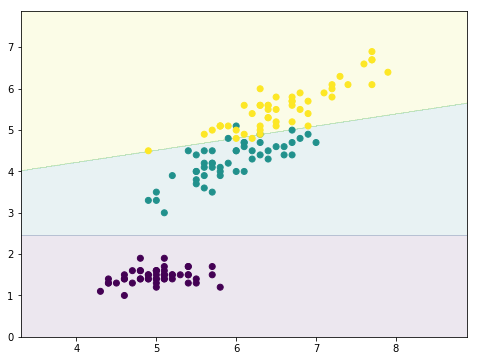

poly


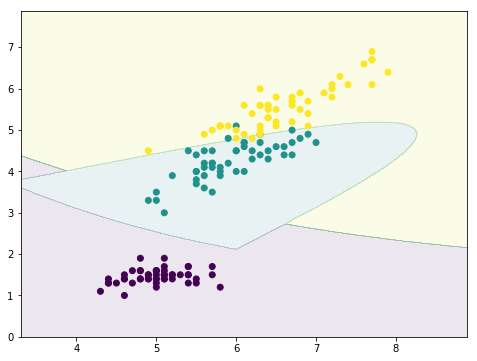

rbf


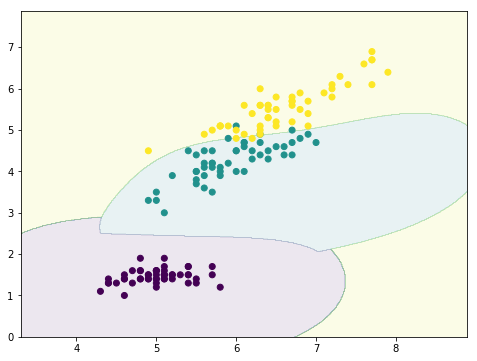

In [15]:
# SVM

import numpy as np
from sklearn.svm import SVC

features = ['Sepal.Length', 'Petal.Length']

x = df[features].as_matrix()
y = df.labels

for kernel in ['linear', 'poly', 'rbf']:
    print(kernel)

    clf = SVC(kernel=kernel, C=10)
    clf.fit(x, y)

    # predict

    xv, yv = np.meshgrid(np.arange(x[:, 0].min() - 1, x[:, 0].max() + 1, 0.01),
                         np.arange(x[:, 1].min() - 1, x[:, 1].max() + 1, 0.01))
    z = clf.predict(np.stack((xv.ravel(), yv.ravel()), axis=-1))

    # plot

    plt.contourf(xv, yv, z.reshape(xv.shape), alpha=0.1)
    plt.scatter(x[:, 0], x[:, 1], c=y)
    plt.show()